In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from hubbard import Hubbard

# Parameters
lattice_size = 10  # Lattice is 10x10
num_electrons_values = [50, 75, 90, 100, 110, 125, 150]  # Different electron counts
num_steps = 25000  # Total attempted steps
u_t_values_dense = np.logspace(-1, 1, 30)  # Denser points in (-1, 1)
u_t_values_wide = np.logspace(-3, 3, 30)  # Wider range (-3, 3)

# Combine and remove duplicates, then sort
u_t_values = np.unique(np.concatenate((u_t_values_dense, u_t_values_wide)))

# Run the simulation for different electron counts
results = {}  # Dictionary to store results for each num_electrons

for num_electrons in num_electrons_values:
    success_ratios = []  # Store success ratios for this electron count
    
    for u_t in u_t_values:
        u = u_t  # On-site repulsion
        t = 1.0  # Hopping parameter (fixed to 1)
        
        # Initialize the Hubbard model
        hubbard = Hubbard(size=lattice_size, u=u, t=t, num_electrons=num_electrons)
        hubbard.initialize_lattice()
        
        # Track successful and failed attempts
        successful = 0
        failed = 0
        
        for _ in range(num_steps):
            success, _, _, _ = hubbard.simulate_step()
            if success:
                successful += 1
            else:
                failed += 1
        
        # Compute the success ratio
        success_ratio = successful / (successful + failed)
        success_ratios.append(success_ratio)
    
    # Store results for this electron count
    results[num_electrons] = success_ratios

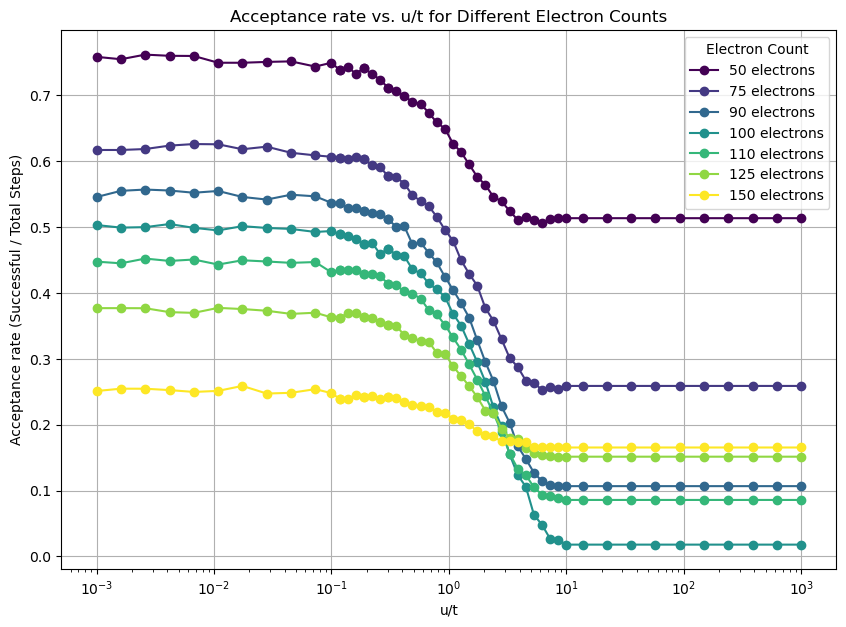

In [23]:
# Plot the results
plt.figure(figsize=(10, 7))

colors = plt.cm.viridis(np.linspace(0, 1, len(num_electrons_values)))  # Generate distinct colors

for idx, num_electrons in enumerate(num_electrons_values):
    plt.plot(u_t_values, results[num_electrons], 
             marker='o', linestyle='-', color=colors[idx], label=f'{num_electrons} electrons')

plt.xscale('log')
plt.xlabel('u/t')
plt.ylabel('Acceptance rate (Successful / Total Steps)')
plt.title('Acceptance rate vs. u/t for Different Electron Counts')
plt.legend(title='Electron Count')
plt.grid(True)
plt.show()

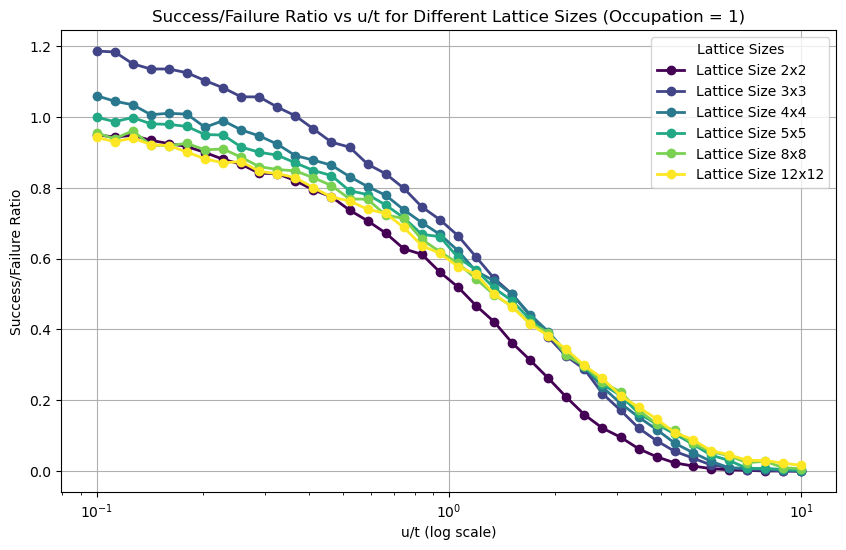

In [28]:
# Parameters
lattice_sizes = [2, 3, 4, 5, 8, 12]  # Lattice sizes to consider
u_t_values = np.logspace(-1, 1, 40)   # Denser points in range (-1, 1))
step_count = 50000  # Number of simulation steps
seed = 42  # Seed for reproducibility

# Initialize plot
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(lattice_sizes)))  # Unique color for each size

# Loop through lattice sizes
for i, size in enumerate(lattice_sizes):
    num_electrons = size ** 2  # Fully occupied lattice
    success_ratios = []

    # Loop through u/t values
    for u_t in u_t_values:
        u = u_t
        t = 1.0

        # Initialize the Hubbard model
        hubbard = Hubbard(size=size, u=u, t=t, num_electrons=num_electrons, seed=seed)
        hubbard.initialize_lattice()

        # Perform steps and count successes and failures
        success_count, fail_count = 0, 0
        for _ in range(step_count):
            success, _, _, _ = hubbard.simulate_step()
            if success:
                success_count += 1
            else:
                fail_count += 1

        # Compute success ratio
        success_ratio = success_count / (fail_count + 1e-10)  # Avoid division by zero
        success_ratios.append(success_ratio)

    # Plot results for this lattice size
    plt.plot(
        u_t_values,
        success_ratios,
        marker='o',
        linestyle='-',
        label=f"Lattice Size {size}x{size}",
        color=colors[i],
        lw=2
    )

# Plot formatting
plt.xscale("log")
plt.xlabel("u/t (log scale)")
plt.ylabel("Success/Failure Ratio")
plt.title("Success/Failure Ratio vs u/t for Different Lattice Sizes (Occupation = 1)")
plt.legend(title="Lattice Sizes")
plt.grid(True)
plt.show()